In [1]:
import torchvision.models as models
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
bouding_box_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()
skeleton_model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval()

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.C

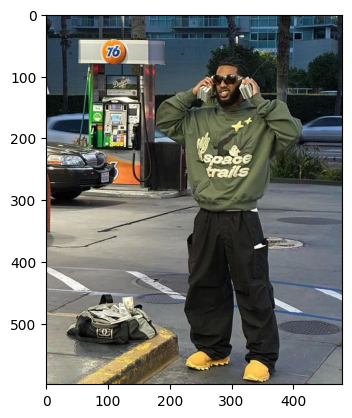

In [3]:
image = cv2.imread('test1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

# Bounding Box

In [4]:
image_tensor = torch.from_numpy(image / 255.).permute(2, 0, 1).float().unsqueeze(0)

with torch.no_grad():
    bounding_box = bouding_box_model(image_tensor)
print(bounding_box)

[{'boxes': tensor([[1.8700e+02, 5.7714e+01, 4.1624e+02, 5.9900e+02],
        [1.1658e+00, 2.0397e+02, 1.0828e+02, 3.0640e+02],
        [4.0700e+02, 1.6285e+02, 4.8000e+02, 2.0992e+02],
        [3.1243e+02, 1.1223e+02, 3.3307e+02, 1.4112e+02],
        [0.0000e+00, 1.5984e+02, 7.6433e+01, 2.1503e+02],
        [4.0261e+01, 4.6753e+02, 1.6913e+02, 5.3712e+02],
        [3.2005e+02, 1.1244e+02, 3.3360e+02, 1.3460e+02],
        [6.3699e+00, 2.6887e+02, 1.6115e+01, 3.0749e+02],
        [4.1501e+01, 4.6606e+02, 1.7407e+02, 5.4431e+02],
        [4.6413e+01, 4.6817e+02, 1.6656e+02, 5.4290e+02],
        [1.3752e+02, 4.6952e+02, 1.7413e+02, 5.0729e+02],
        [8.9828e+01, 1.2886e+02, 1.4483e+02, 2.1285e+02],
        [3.2588e+02, 1.1238e+02, 3.3374e+02, 1.2914e+02],
        [1.3433e+02, 4.7596e+02, 1.7879e+02, 5.2436e+02],
        [1.7166e+02, 7.6177e+01, 4.1241e+02, 3.5049e+02],
        [7.0055e+00, 2.8971e+02, 1.6716e+01, 3.0668e+02],
        [4.7149e-01, 2.4860e+02, 9.5015e+00, 3.5645e+02],
   

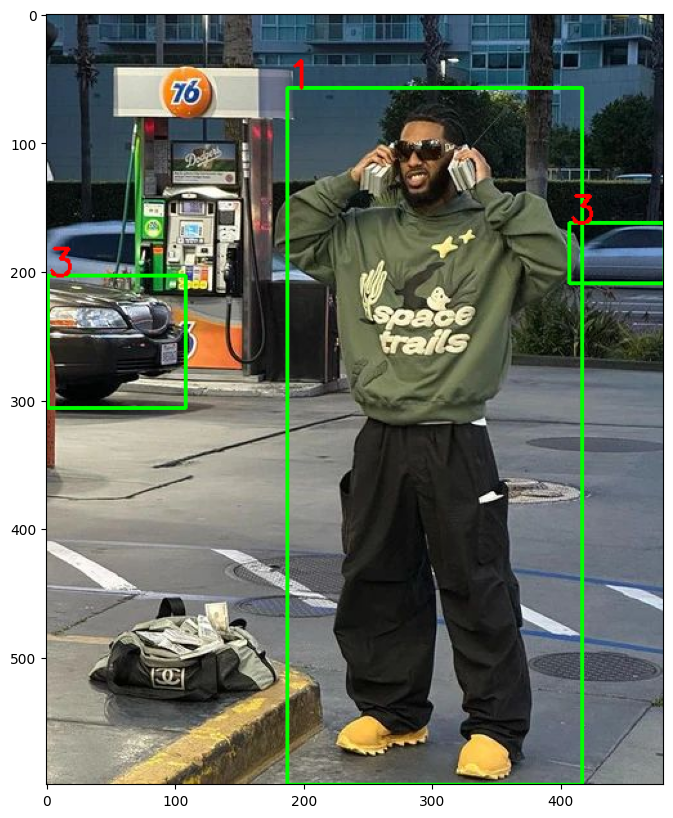

In [5]:
plt.figure(figsize=(10, 10))

for idx in range(len(bounding_box[0])):
    box_coord = bounding_box[0]['boxes'][idx]
    label = bounding_box[0]['labels'][idx]

    box_coord = box_coord.numpy().astype(np.int32)
    label = label.numpy().astype(np.int32)
    image = cv2.rectangle(image, (box_coord[0], box_coord[1]), (box_coord[2], box_coord[3]), (0, 255, 0), 2)
    image = cv2.putText(image, str(label), (box_coord[0], box_coord[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.imshow(image)
plt.show()

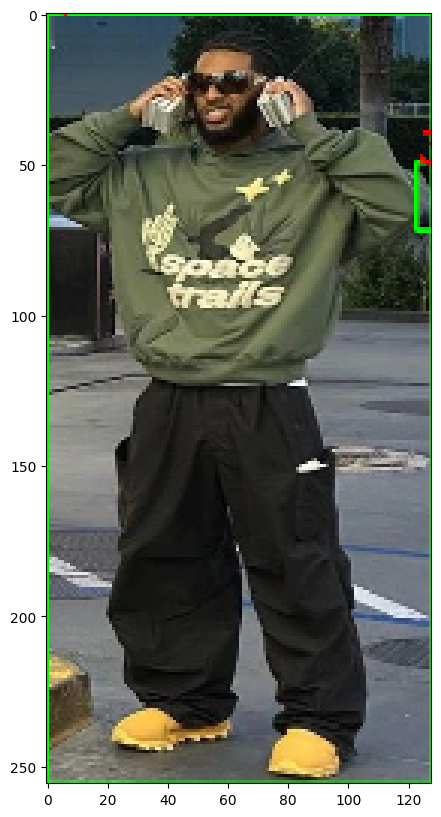

In [6]:
extracted_human = []
for idx in range(len(bounding_box[0])):
    box_coord = bounding_box[0]['boxes'][idx]
    label = bounding_box[0]['labels'][idx]

    if label == 1:
        box_coord = box_coord.numpy().astype(np.int32)
        human = image[box_coord[1]:box_coord[3], box_coord[0]:box_coord[2]]
        human = cv2.resize(human, (128, 256))
        extracted_human.append(human)

plt.figure(figsize=(10, 10))
for idx, human in enumerate(extracted_human):
    plt.subplot(1, len(extracted_human), idx + 1)
    plt.imshow(human)

plt.show()

In [7]:
with torch.no_grad():
    for human in extracted_human:
        human_tensor = torch.from_numpy(human / 255.).permute(2, 0, 1).float().unsqueeze(0)
        skeleton = skeleton_model(human_tensor)

print(skeleton)

[{'boxes': tensor([[ 15.5051,  18.0046, 112.5841, 249.1470],
        [  4.6000,   8.1530, 118.4039, 128.2125],
        [ 18.3798, 121.6110,  81.2879, 245.5035],
        [ 37.6951,   6.3163, 110.4246,  99.6033]]), 'labels': tensor([1, 1, 1, 1]), 'scores': tensor([0.9781, 0.9022, 0.3274, 0.0689]), 'keypoints': tensor([[[ 55.3152,  27.5075,   1.0000],
         [ 62.2220,  18.6765,   1.0000],
         [ 51.8617,  18.6765,   1.0000],
         [ 75.6519,  27.6995,   1.0000],
         [ 47.0653,  27.5075,   1.0000],
         [ 86.7795,  55.7284,   1.0000],
         [ 31.7169,  52.2728,   1.0000],
         [112.2963,  67.0552,   1.0000],
         [ 15.7928,  42.0979,   1.0000],
         [ 88.3144,  39.6022,   1.0000],
         [ 27.4960,  33.8428,   1.0000],
         [ 73.1577, 129.6402,   1.0000],
         [ 42.0771, 129.2563,   1.0000],
         [ 80.4483, 182.8184,   1.0000],
         [ 41.6934, 182.0504,   1.0000],
         [ 90.6166, 234.0767,   1.0000],
         [ 48.6002, 231.5810,   1.

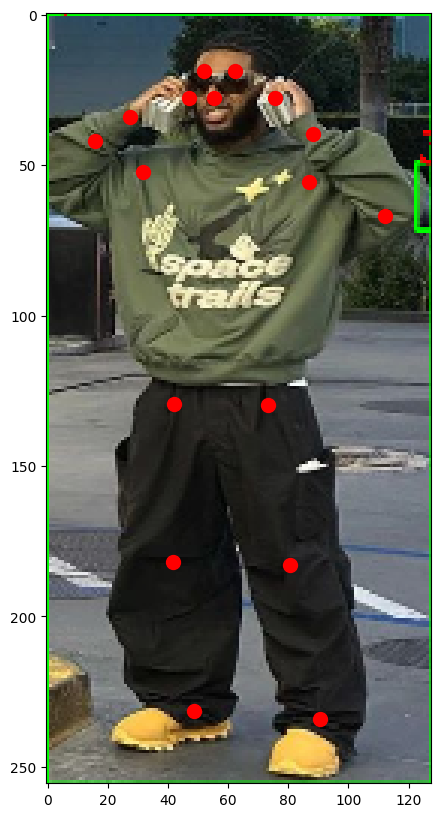

In [15]:
plt.figure(figsize=(10, 10))
for idx in range(len(skeleton[0]['keypoints'])):
    score = skeleton[0]['scores'][idx]
    if score < 0.95:
        continue

    point = skeleton[0]['keypoints'][idx]
    for idx, coord in enumerate(point):
        plt.scatter(coord[0], coord[1], s=100, c='r')

plt.imshow(extracted_human[0])
plt.show()